In [1]:
#data loading
import pandas as pd

from matplotlib import pyplot as plt

a=pd.read_csv("/content/StudentsPerformance.csv")
print(a)
a.isna().sum()

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

     math score  reading score  writing score test preparation course  
0          72.0             72             74                  

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
math score,1
reading score,0
writing score,0
test preparation course,0


In [2]:
a["math score"]=a["math score"].fillna(0.0)

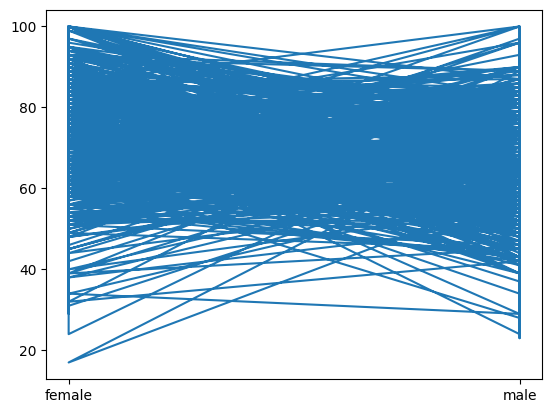

In [3]:
plt.plot(a["gender"],a["reading score"])

<BarContainer object of 1000 artists>

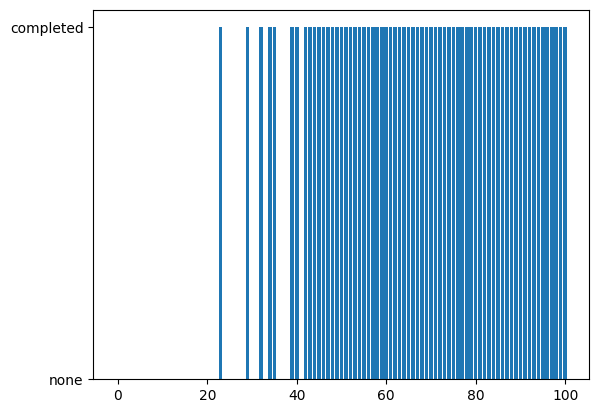

In [4]:
plt.bar(a["math score"],a["test preparation course"])

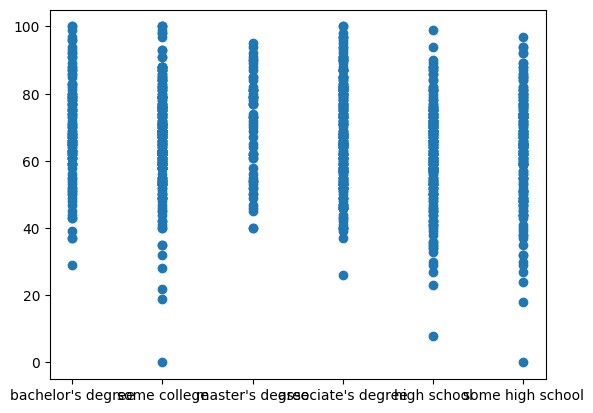

In [5]:
plt.scatter(a["parental level of education"], a["math score"])

In [6]:
a.head()


,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,test preparation course
0,female,group B,bachelor's degree,standard,72.0,72,74,none
1,female,group C,some college,standard,69.0,90,88,completed
2,female,group B,master's degree,standard,90.0,95,93,none
3,male,group A,associate's degree,free/reduced,47.0,57,44,none
4,male,group C,some college,standard,76.0,78,75,none


In [9]:
from sklearn.preprocessing import LabelEncoder
b=LabelEncoder()
a["gender"]=b.fit_transform(a["gender"])
a["race/ethnicity"]=b.fit_transform(a["race/ethnicity"])
a["parental level of education"]=b.fit_transform(a["parental level of education"])
a["lunch"]=b.fit_transform(a["lunch"])
a["math score"]=b.fit_transform(a["math score"])
a["test preparation course"]=b.fit_transform(a["test preparation course"])
a["reading score"]=b.fit_transform(a["reading score"])
print(a)

     gender  race/ethnicity  parental level of education  lunch  math score  \
0         0               1                            1      1          52   
1         0               2                            4      1          49   
2         0               1                            3      1          70   
3         1               0                            0      0          27   
4         1               2                            4      1          56   
..      ...             ...                          ...    ...         ...   
995       0               4                            3      1          68   
996       1               2                            2      0          42   
997       0               2                            2      0          39   
998       0               3                            4      1          48   
999       0               3                            4      0           0   

     reading score  writing score  test preparation

In [10]:
x=a.iloc[:,:-1]
y=a["test preparation course"]
print(x)

     gender  race/ethnicity  parental level of education  lunch  math score  \
0         0               1                            1      1          52   
1         0               2                            4      1          49   
2         0               1                            3      1          70   
3         1               0                            0      0          27   
4         1               2                            4      1          56   
..      ...             ...                          ...    ...         ...   
995       0               4                            3      1          68   
996       1               2                            2      0          42   
997       0               2                            2      0          39   
998       0               3                            4      1          48   
999       0               3                            4      0           0   

     reading score  writing score  
0              

In [11]:
print(y)

0      1
1      0
2      1
3      1
4      1
      ..
995    0
996    1
997    0
998    0
999    1
Name: test preparation course, Length: 1000, dtype: int64


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [13]:
print(x_train)

     gender  race/ethnicity  parental level of education  lunch  math score  \
558       0               1                            0      0          33   
965       0               3                            4      1          42   
279       1               1                            1      0          53   
749       1               1                            4      1          67   
74        1               2                            5      1          29   
..      ...             ...                          ...    ...         ...   
308       0               1                            0      0          33   
632       0               1                            1      1          46   
446       1               3                            4      0          49   
450       0               2                            4      0          44   
329       0               1                            5      1          21   

     reading score  writing score  
558            

In [14]:
print(y_train)

558    1
965    1
279    1
749    0
74     1
      ..
308    1
632    0
446    1
450    0
329    1
Name: test preparation course, Length: 800, dtype: int64


In [15]:
print(x_test)

     gender  race/ethnicity  parental level of education  lunch  math score  \
286       1               4                            0      1          77   
821       0               3                            1      0          58   
338       0               1                            5      0           6   
511       1               0                            5      1          44   
77        1               0                            1      1          60   
..      ...             ...                          ...    ...         ...   
504       0               3                            3      0          20   
362       0               2                            4      1          32   
241       0               4                            1      1          60   
722       0               1                            5      0          54   
349       1               4                            0      1          67   

     reading score  writing score  
286            

In [16]:
print(y_test)

286    0
821    1
338    1
511    1
77     0
      ..
504    1
362    1
241    1
722    0
349    1
Name: test preparation course, Length: 200, dtype: int64


In [17]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

In [18]:
print(model.predict(x_test))

[0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1
 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1
 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1]


In [19]:
print(model.predict([[1,4,0,1,77,54,88]]))

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,ypred))

0.74
